In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator

In [2]:
df = pd.read_csv('jobs_cleaned.csv')

In [3]:
del df['Unnamed: 0']

In [4]:
df

,Job,Salary_Begin,Salary_End,Hourly,Monthly,Yearly,Company,Rating,Posted_Date,Posted_Month,Type,Benefits,Qualifications,Job Link
0,21 - Desktop Support Technician,16.0,39.0,1.0,0.0,0.0,PayPal,3.9,26.0,9.0,Full-time,"Health insurance, Dental insurance, Vision ins...","MCITP, Computer Science, MCP, MCSE, Bachelor's...",https://www.simplyhired.com/job/pE0v8mYHrd0RXV...
1,Operations Associate (entry-level),60000.0,80000.0,0.0,0.0,1.0,Databento,NaN,NaN,NaN,NaN,"Disability insurance, Health insurance, Dental...","Lever, Sales, Marketing, Writing skills, ATS, ...",https://www.simplyhired.com/job/UhRG9kuufwPfvq...
2,IT Helpdesk Remote Support; Support Specialist I,35100.0,44500.0,0.0,0.0,1.0,Liberty University,3.8,NaN,NaN,Full-time,NaN,"Microsoft Powerpoint, Microsoft Word, Computer...",https://www.simplyhired.com/job/G03Xkf3I0D3Xng...
3,IT Support Specialist II - $5000 - Remote,NaN,5000.0,0.0,1.0,0.0,Gold Alliance,4.7,4.0,10.0,Full-time,"Health insurance, 401(k), Paid time off, On-th...","Azure, Management, Computer Science, Software ...",https://www.simplyhired.com/job/5wPI9EftH0tZxN...
4,IT Help Desk Technician,41700.0,52800.0,0.0,0.0,1.0,Advanced Computer Solutions,5.0,NaN,NaN,Full-time,NaN,"Software troubleshooting, Bachelor of Science,...",https://www.simplyhired.com/job/9kinGpt9ZFmjYb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,Software Engineer,107000.0,136000.0,0.0,0.0,1.0,Caterpillar,3.8,NaN,NaN,Full-time,Work from home,"Java, Master's degree, Bachelor's degree, Java...",https://www.simplyhired.com/job/wORmIblVsfINSg...
931,Data & Analytics Consultant - Qlik/Microsoft P...,94900.0,120000.0,0.0,0.0,1.0,InOutsource LLC,3.0,NaN,NaN,NaN,"Disability insurance, Health insurance, 401(k)...","RESTful API, Relational databases, Microsoft O...",https://www.simplyhired.com/job/mbvwkfrSSFPiJF...
932,Technical Data Owner,82400.0,104000.0,0.0,0.0,1.0,Step Up For Students,3.5,NaN,NaN,Full-time,"Health savings account, Disability insurance, ...","Microsoft Powerpoint, Microsoft Word, Computer...",https://www.simplyhired.com/job/9ZfbJBwL8amjdw...
933,Business Analyst,87700.0,111000.0,0.0,0.0,1.0,SunStream Business Services,1.0,NaN,NaN,Full-time,NaN,"Computer Science, 5 years, Writing skills, Bus...",https://www.simplyhired.com/job/Z4oJEFMmwpgClW...


In [5]:
print(df['Job'].value_counts())

Software Engineer                                                32
Data Engineer                                                    25
Data Analyst                                                     13
Software Developer                                               10
Quality Assurance Engineer                                        8
                                                                 ..
Integration Analyst                                               1
Part-Time Student-Product Engineering-Fargo ND-Partial Remote     1
HEDIS Data Analyst                                                1
Software Quality Engineer (Remote)                                1
NodeJS Developer (Electron)                                       1
Name: Job, Length: 757, dtype: int64


In [6]:
df['Qualifications'] = df['Qualifications'].apply(lambda x: str(x))
df['Benefits'] = df['Benefits'].apply(lambda x: str(x))

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'Data Scientist'
    elif 'AI ' in title.upper() or 'artificial intelligence' in title.lower():
        return 'Artificial Intelligence'
    elif 'analyst' in title.lower():
        return 'Analyst'
    elif 'cloud' in title.lower():
        return 'Cloud Engineer'
    elif 'security' in title.lower():
        return 'Security Engineer'
    elif 'IT ' in title.upper():
        return 'IT Engineer'
    elif 'quality' in title.lower():
        return 'Quality Assurance Engineer'
    elif 'web' in title.lower():
        return 'Web Developer'
    elif 'software engineer' in title.lower():
        return 'Software Engineer'
    elif 'software developer' in title.lower() or 'developer' in title.lower():
        return 'Software Developer'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'manager' in title.lower():
        return 'Manager'
    elif 'admin' in title.lower():
        return 'Administrator'
    elif 'director' in title.lower():
        return 'Director'
    else:
        return 'Others'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'head' in title.lower() or 'expert' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'entry' in title.lower():
        return 'junior'
    else:
        return 'nan'
    
def location_type(title):
    if 'physical' in title.lower() or 'on-site' in title.lower() or 'onsite' in title.lower() or 'on site' in title.lower() or 'in-site' in title.lower() or 'insite' in title.lower() or 'in site' in title.lower():
        return 'Physical'
    elif 'hybrid' in title.lower():
        return 'Hybrid'
    elif 'remote' in title.lower():
        return 'Remote'
    else:
        return 'nan'

In [8]:
df['Job_simp'] = df['Job'].apply(title_simplifier)

In [9]:
df['Job_simp'].value_counts()

Others                        309
Analyst                       218
Software Engineer             126
Software Developer             55
Data Engineer                  55
IT Engineer                    41
Administrator                  39
Quality Assurance Engineer     32
Web Developer                  20
Data Scientist                 14
Manager                        10
Security Engineer               9
Artificial Intelligence         3
Director                        2
Cloud Engineer                  2
Name: Job_simp, dtype: int64

In [10]:
df['Job_seniority1'] = df['Job'].apply(seniority)
df['Job_seniority2'] = df['Qualifications'].apply(seniority)
df['Job_seniority'] = df.apply(lambda x: 'senior' if x.Job_seniority1 == 'senior' or x.Job_seniority2 == 'senior' else 'junior' if x.Job_seniority1 == 'junior' or x.Job_seniority2 == 'junior' else 'nan', axis=1)
del df['Job_seniority1']
del df['Job_seniority2']

In [11]:
df['Job_seniority'].value_counts()

nan       782
senior    121
junior     32
Name: Job_seniority, dtype: int64

In [12]:
df['Location_type1'] = df['Job'].apply(location_type)
df['Location_type2'] = df['Benefits'].apply(location_type)
df['Location_type3'] = df['Qualifications'].apply(location_type)
df['Location_type'] = df.apply(lambda x: 'Physical' if x.Location_type1 == 'Physical' or x.Location_type2 == 'Physical' or x.Location_type3 == 'Physical' else 'Hybrid' if x.Location_type1 == 'Hybrid' or x.Location_type2 == 'Hybrid' or x.Location_type3 == 'Hybrid' else 'Remote' if x.Location_type1 == 'Remote' or x.Location_type2 == 'Remote' or x.Location_type3 == 'Remote' else 'nan', axis = 1)
del df['Location_type1']
del df['Location_type2']
del df['Location_type3']

In [13]:
df.Location_type.value_counts()

nan         778
Remote      150
Physical      4
Hybrid        3
Name: Location_type, dtype: int64

In [14]:
df['Qualifications'] = df['Qualifications'].apply(lambda x: x.replace(' ', '').lower())
df['Benefits'] = df['Benefits'].apply(lambda x: x.replace(' ', '').lower())

In [15]:
def remove_duplicates(string):
    elements = [x.strip() for x in string.split(',')]
    unique_elements = list(set(elements))
    return ','.join(unique_elements)

df['Qualifications'] = df['Qualifications'].apply(remove_duplicates)
df['Benefits'] = df['Benefits'].apply(remove_duplicates)

In [16]:
def make_num(df, column, num_column):
    df[num_column] = df[column].apply(lambda x: len(x.split(',')) if x != 'nan' else 0)
    
make_num(df, 'Qualifications', 'num_Qualifications')
make_num(df, 'Benefits', 'num_Benefits')

In [17]:
qualifications = pd.Series([])
benefits = pd.Series([])
def series(series_name, column, num_column):
    for i in range(0, len(df)):
        for j in range(0, int(df[num_column][i])):
            item = df[column][i].split(',')[j]
            series_name.loc[len(series_name)] = str(item)   
            
series(qualifications, 'Qualifications', 'num_Qualifications')
series(benefits, 'Benefits', 'num_Benefits')

C:\Users\bishe\AppData\Local\Temp\ipykernel_2856\2920130941.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  qualifications = pd.Series([])
C:\Users\bishe\AppData\Local\Temp\ipykernel_2856\2920130941.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  benefits = pd.Series([])


In [18]:
qualifications = qualifications.apply(lambda x: str(x))
benefits = benefits.apply(lambda x: str(x))

In [19]:
print(df['num_Qualifications'].sum())
qualifications

13160


0                     2years
1           bachelor'sdegree
2                       mcse
3                      mcitp
4            computerscience
                ...         
13155        computerscience
13156    computerengineering
13157              scripting
13158    softwareengineering
13159                    svn
Length: 13160, dtype: object

In [20]:
qualifications.value_counts()

bachelor'sdegree        815
computerscience         755
communicationskills     524
sql                     294
analysisskills          231
                       ... 
biology                   1
aerospaceengineering      1
photoediting              1
graphicdesign             1
lending                   1
Length: 882, dtype: int64

In [21]:
benefits.value_counts()

healthinsurance             495
401(k)                      428
dentalinsurance             417
visioninsurance             385
paidtimeoff                 370
                           ... 
meals&incidentalsstipend      1
457(b)                        1
companycar                    1
uniformallowance              1
401(k)6%match                 1
Length: 74, dtype: int64

In [22]:
print(df['num_Benefits'].sum())
benefits

4186


0            healthinsurance
1            visioninsurance
2              lifeinsurance
3            dentalinsurance
4              lifeinsurance
                ...         
4181                  401(k)
4182             paidtimeoff
4183    tuitionreimbursement
4184     disabilityinsurance
4185        flexibleschedule
Length: 4186, dtype: object

In [23]:
#Transformed the salary into yearly and calculated the average salary
df['Salary_Begin'] = df.apply(lambda x: x.Salary_Begin*2000.0 if x.Hourly == 1.0 else x.Salary_Begin*12.0 if x.Monthly == 1.0 else x.Salary_Begin, axis = 1)
df['Salary_End'] = df.apply(lambda x: x.Salary_End*2000.0 if x.Hourly == 1.0 else x.Salary_End*12.0 if x.Monthly == 1.0 else x.Salary_End, axis = 1)
df['Salary_Average'] = df.apply(lambda x: (x.Salary_Begin + x.Salary_End)/2.0 if x.Salary_Begin != float('nan') and x.Salary_End != float('nan') else float('nan'), axis = 1)

In [24]:
df[['Salary_Begin', 'Salary_End', 'Salary_Average']]

,Salary_Begin,Salary_End,Salary_Average
0,32000.0,78000.0,55000.0
1,60000.0,80000.0,70000.0
2,35100.0,44500.0,39800.0
3,NaN,60000.0,NaN
4,41700.0,52800.0,47250.0
...,...,...,...
930,107000.0,136000.0,121500.0
931,94900.0,120000.0,107450.0
932,82400.0,104000.0,93200.0
933,87700.0,111000.0,99350.0


In [25]:
df['Type'].value_counts()

Full-time                                    589
Contract                                      35
Full-time, Contract                           32
Part-time                                     17
Part-time, Full-time                           5
Permanent, Full-time                           4
Temporary, Contract                            2
Temporary                                      1
Full-time, Apprenticeship                      1
Part-time, Contract                            1
Temporary, Full-time                           1
Temporary, Part-time, Full-time, Contract      1
Permanent, Part-time, Full-time, Contract      1
Permanent, Full-time, Contract                 1
Temporary, Part-time                           1
Freelance                                      1
Temp-to-hire, Contract                         1
Name: Type, dtype: int64

In [26]:
df['Type'] = df['Type'].apply(lambda x: str(x))
df['Type'] = df['Type'].apply(lambda x: x.replace(', ', ','))
make_num(df, 'Type', 'num_Type')
Type = pd.Series([])
series(Type, 'Type', 'num_Type')
Type.value_counts()

C:\Users\bishe\AppData\Local\Temp\ipykernel_2856\1286314707.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Type = pd.Series([])


Full-time         635
Contract           74
Part-time          26
Permanent           6
Temporary           6
Apprenticeship      1
Freelance           1
Temp-to-hire        1
dtype: int64

In [27]:
df.describe()

,Salary_Begin,Salary_End,Hourly,Monthly,Yearly,Rating,Posted_Date,Posted_Month,num_Qualifications,num_Benefits,Salary_Average,num_Type
count,871.000000,884.000000,901.000000,901.000000,901.000000,664.000000,453.000000,453.000000,935.000000,935.000000,854.000000,935.000000
mean,84922.963261,110528.804299,0.093230,0.002220,0.904550,3.601807,14.807947,9.536424,14.074866,4.477005,98090.035714,0.802139
std,26739.170994,37103.994266,0.290916,0.047088,0.293998,0.780260,11.035371,0.499223,6.142383,4.699453,30870.751933,0.542020
min,12000.000000,30000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,1.000000,0.000000,27000.000000,0.000000
25%,65150.000000,85000.000000,0.000000,0.000000,1.000000,3.200000,5.000000,9.000000,10.000000,0.000000,76681.250000,0.000000
50%,81900.000000,105500.000000,0.000000,0.000000,1.000000,3.700000,6.000000,10.000000,13.000000,3.000000,95000.000000,1.000000
75%,99800.000000,126250.000000,0.000000,0.000000,1.000000,4.000000,27.000000,10.000000,18.000000,8.000000,113875.000000,1.000000
max,220000.000000,300000.000000,1.000000,1.000000,1.000000,5.000000,30.000000,10.000000,42.000000,19.000000,242150.000000,4.000000


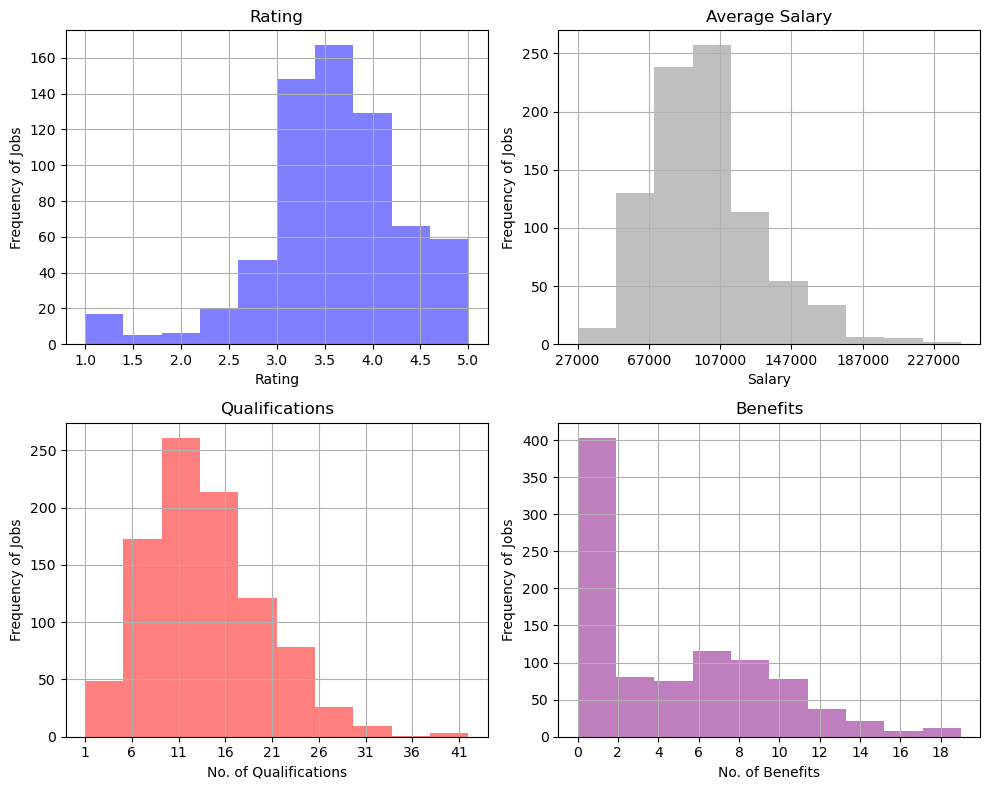

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].hist(df['Rating'], bins=10, alpha=0.5, color='blue')
axes[0, 0].set_title('Rating')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency of Jobs')
axes[0, 0].grid()

axes[0, 1].hist(df['Salary_Average'], bins=10, alpha=0.5, color='gray')
x_ticks = np.arange(int(min(df['Salary_Average'])), int(max(df['Salary_Average'])), 40000)
axes[0, 1].set_xticks(x_ticks)
axes[0, 1].set_title('Average Salary')
axes[0, 1].set_xlabel('Salary')
axes[0, 1].set_ylabel('Frequency of Jobs')
axes[0, 1].grid()

axes[1, 0].hist(df['num_Qualifications'], bins=10, alpha=0.5, color='red')
x_ticks = np.arange(int(min(df['num_Qualifications'])), int(max(df['num_Qualifications'])), 5)
axes[1, 0].set_xticks(x_ticks)
axes[1, 0].set_title('Qualifications')
axes[1, 0].set_xlabel('No. of Qualifications')
axes[1, 0].set_ylabel('Frequency of Jobs')
axes[1, 0].grid()

axes[1, 1].hist(df['num_Benefits'], bins=10, alpha=0.5, color='purple')
x_ticks = np.arange(int(min(df['num_Benefits'])), int(max(df['num_Benefits'])), 2)
axes[1, 1].set_xticks(x_ticks)
axes[1, 1].set_title('Benefits')
axes[1, 1].set_xlabel('No. of Benefits')
axes[1, 1].set_ylabel('Frequency of Jobs')
axes[1, 1].grid()

plt.tight_layout()

plt.show()

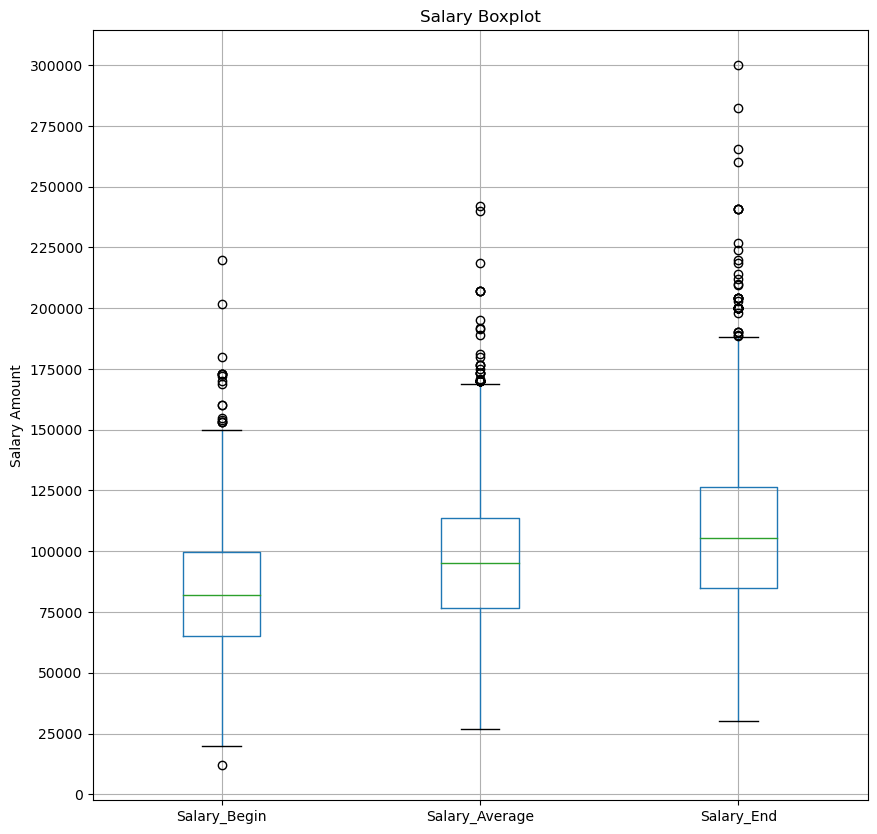

In [131]:
plt.figure(figsize=(10, 10))

df.boxplot(['Salary_Begin', 'Salary_Average', 'Salary_End'])
y_ticks = np.arange(0, 325000, 25000)  # This will create ticks at intervals of 2
y_tick_labels = [str(y) for y in y_ticks]

plt.yticks(y_ticks, y_tick_labels)

# Set other labels and titles
plt.ylabel("Salary Amount")
plt.title("Salary Boxplot")

plt.show()

<Axes: >

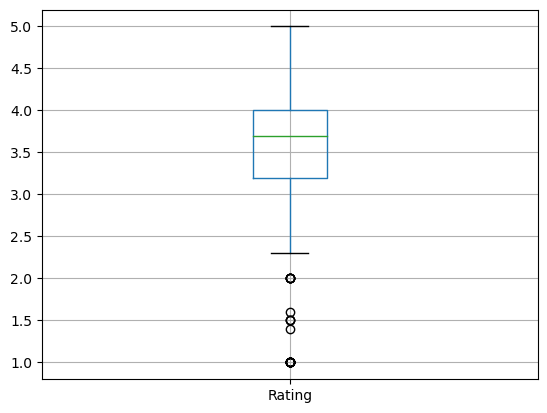

In [48]:
df.boxplot(column = 'Rating')

In [85]:
df[['Salary_Average', 'Rating', 'num_Qualifications', 'num_Benefits', 'num_Type']].corr()

,Salary_Average,Rating,num_Qualifications,num_Benefits,num_Type
Salary_Average,1.000000,0.122684,0.073419,0.101552,-0.039463
Rating,0.122684,1.000000,0.041562,0.081374,-0.002597
num_Qualifications,0.073419,0.041562,1.000000,0.122794,0.035970
num_Benefits,0.101552,0.081374,0.122794,1.000000,0.102664
num_Type,-0.039463,-0.002597,0.035970,0.102664,1.000000


<Axes: >

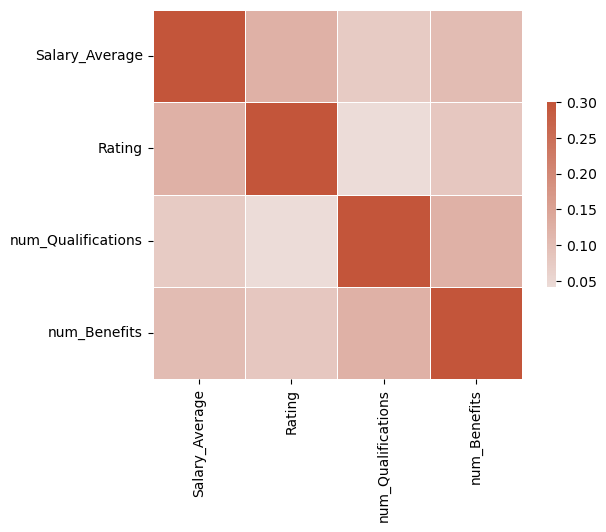

In [132]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[['Salary_Average', 'Rating', 'num_Qualifications', 'num_Benefits']].corr(), cmap = cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

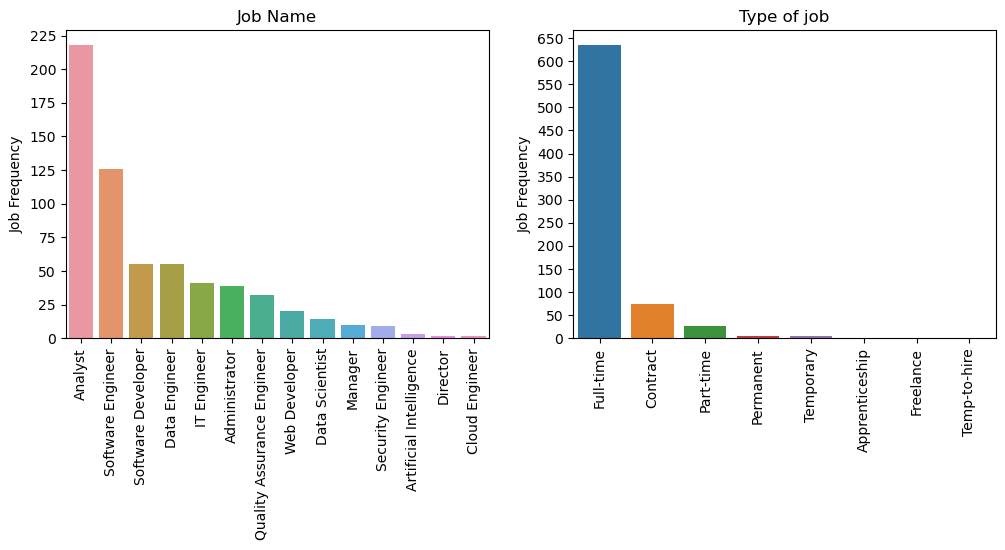

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

chart = sns.barplot(x=df['Job_simp'].value_counts()[1:].index, y=df['Job_simp'].value_counts()[1:], ax=axes[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
axes[0].yaxis.set_major_locator(MultipleLocator(25))
axes[0].set_title('Job Name')
axes[0].set_ylabel('Job Frequency')

chart = sns.barplot(x=Type.value_counts().index, y=Type.value_counts(), ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
axes[1].yaxis.set_major_locator(MultipleLocator(50))
axes[1].set_title('Type of job')
axes[1].set_ylabel('Job Frequency')

plt.show()

Text(0, 0.5, 'Job Frequency')

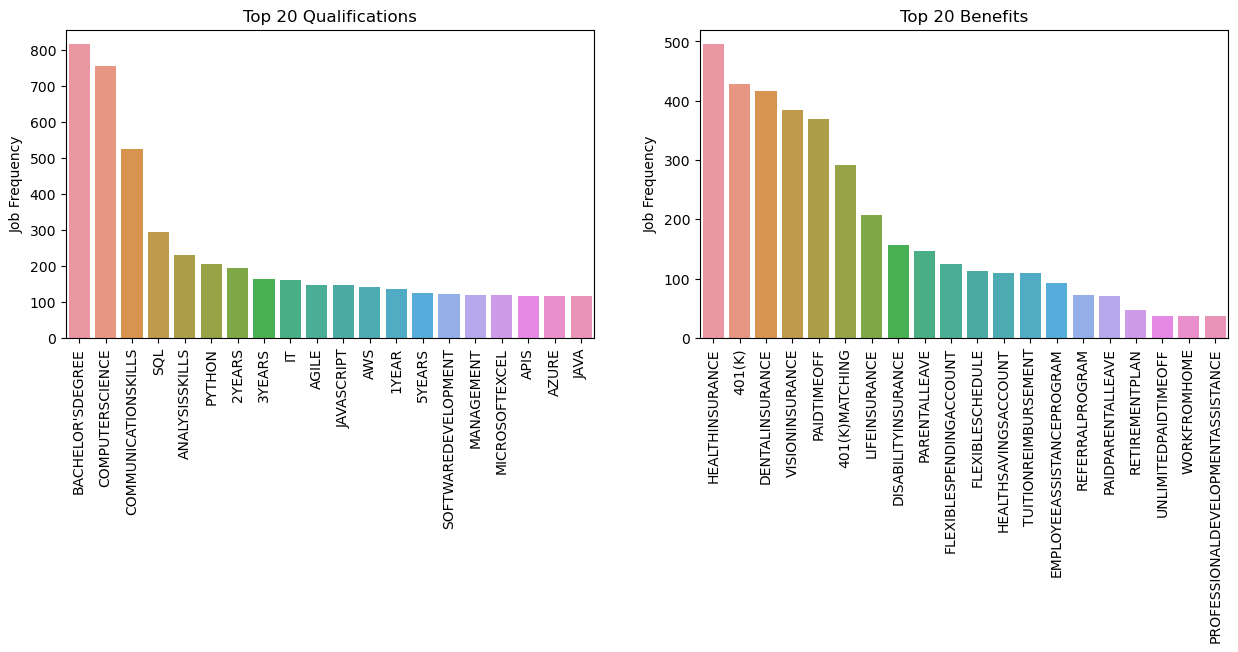

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

qualifications = qualifications.apply(lambda x: x.upper())
chart = sns.barplot(x=qualifications.value_counts()[0:20].index, y=qualifications.value_counts()[0:20], ax=axes[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
axes[0].set_title('Top 20 Qualifications')
axes[0].set_ylabel('Job Frequency')

benefits = benefits.apply(lambda x: x.upper())
chart = sns.barplot(x=benefits.value_counts()[0:20].index, y=benefits.value_counts()[0:20], ax=axes[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
axes[1].set_title('Top 20 Benefits')
axes[1].set_ylabel('Job Frequency')

Graph for Posted Date: total = 15


<function matplotlib.pyplot.show(close=None, block=None)>

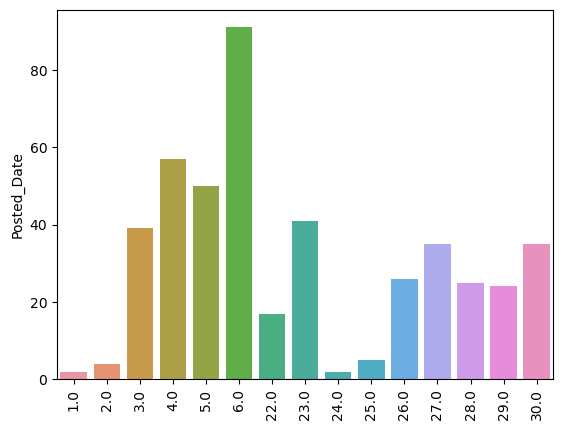

In [43]:
cat_num = df['Posted_Date'].value_counts()
print('Graph for %s: total = %d' % ('Posted Date', len(cat_num)))
chart = sns.barplot(x = cat_num.index, y = cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show

Graph for Posted_Month: total = 2


<function matplotlib.pyplot.show(close=None, block=None)>

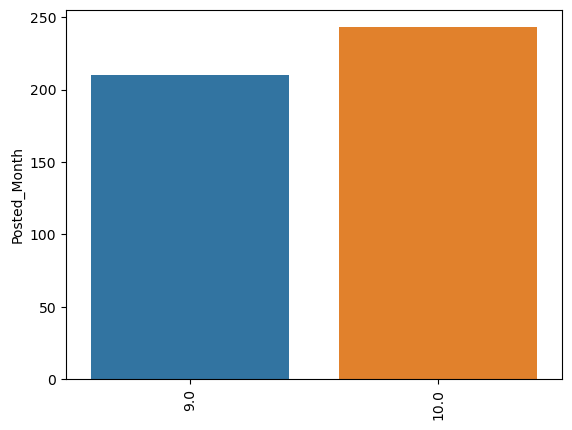

In [44]:
cat_num = df['Posted_Month'].value_counts()
print('Graph for %s: total = %d' % ('Posted_Month', len(cat_num)))
chart = sns.barplot(x = cat_num.index, y = cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show

In [49]:
df.columns

Index(['Job', 'Salary_Begin', 'Salary_End', 'Hourly', 'Monthly', 'Yearly',
       'Company', 'Rating', 'Posted_Date', 'Posted_Month', 'Type', 'Benefits',
       'Qualifications', 'Job Link', 'Job_simp', 'Job_seniority',
       'Location_type', 'num_Qualifications', 'num_Benefits', 'Salary_Average',
       'num_Type'],
      dtype='object')

Graph for Company: total = 30


<function matplotlib.pyplot.show(close=None, block=None)>

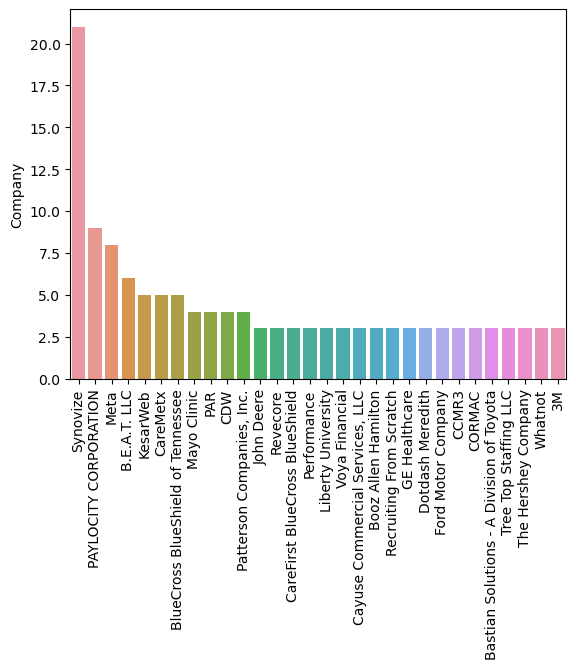

In [50]:
cat_num = df['Company'].value_counts()[0:30]
print('Graph for %s: total = %d' % ('Company', len(cat_num)))
chart = sns.barplot(x = cat_num.index, y = cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show

In [51]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [52]:
pd.pivot_table(df, index = ['Job_simp', 'Job_seniority'], values = 'Salary_Average')

Salary_Average
Job_simp                   Job_seniority                
Administrator              nan              93212.812500
                           senior          121250.000000
Analyst                    junior           86483.333333
                           nan              85308.575758
                           senior          100842.625000
Artificial Intelligence    nan             118980.000000
Cloud Engineer             nan             120525.000000
Data Engineer              junior           93750.000000
                           nan             112776.755556
                           senior          133000.000000
Data Scientist             junior           62000.000000
                           nan             120467.200000
                           senior           94175.000000
IT Engineer                junior           71600.000000
                           nan              76013.034483
                           senior          124792.750000
Manager                    nan              95123.416667
                           senior           82383.333333
Others                     junior           72267.142857
                           nan              93774.661702
                           senior          105417.250000
Quality Assurance Engineer nan              93129.115385
                           senior          118725.000000
Security Engineer          nan             110046.125000
                           senior           87000.000000
Software Developer         junior           77016.666667
                           nan             100108.055556
                           senior          103037.500000
Software Engineer          junior           91950.000000
                           nan             119864.878788
                           senior          139619.611111
Web Developer              junior           52000.000000
                           nan              87948.062500

In [75]:
df['Rating'] = df['Rating'].apply(lambda x: str(x))
df['Rating'] = df['Rating'].apply(lambda x: -1 if x == 'nan' else x)
df['Rating'] = df['Rating'].apply(lambda x: float(x))
pd.pivot_table(df, index = ['Job_simp', 'Job_seniority', 'Rating', 'Location_type'], values = 'Salary_Average').sort_values('Salary_Average', ascending = False)

,,,,Salary_Average
Job_simp,Job_seniority,Rating,Location_type,
Others,senior,1.0,nan,191500.000000
IT Engineer,senior,4.2,nan,180971.000000
Software Engineer,senior,4.1,nan,171866.500000
Security Engineer,nan,3.4,nan,171250.000000
Software Engineer,senior,3.8,nan,170000.000000
Cloud Engineer,nan,-1.0,nan,170000.000000
Software Engineer,nan,4.1,nan,167320.785714
Data Scientist,nan,4.1,Remote,164654.500000
Software Engineer,senior,4.0,nan,162500.000000
